In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
movies=pd.read_csv('D:\\Learn Python\\Python-Self-Learning\\Data\\Movie-Ratings.csv')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(2), int64(3), object(1)
memory usage: 16.8+ KB


In [13]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [15]:
movies.Genre=movies.Genre.astype('category')

In [16]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [18]:
movies.columns=['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 20.5+ KB


In [20]:
movies.Year=movies.Year.astype('category')

In [21]:
movies.Film=movies.Film.astype('category')

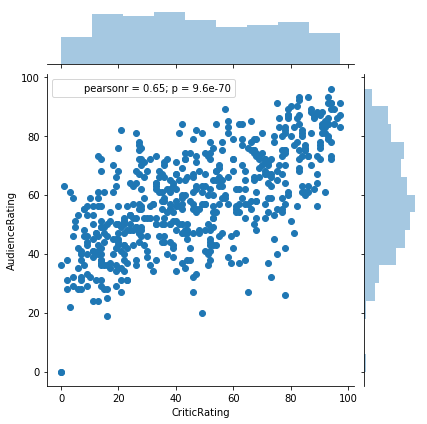

In [22]:
j=sns.jointplot(data=movies,x='CriticRating',y='AudienceRating')

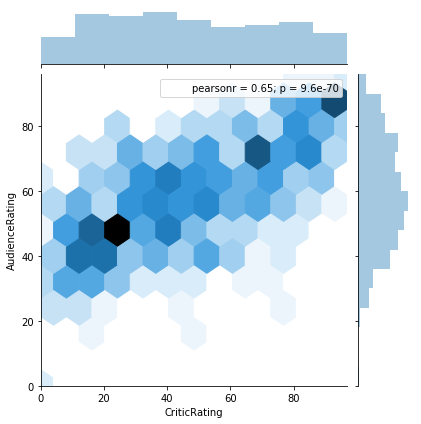

In [23]:
j=sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind='hex')

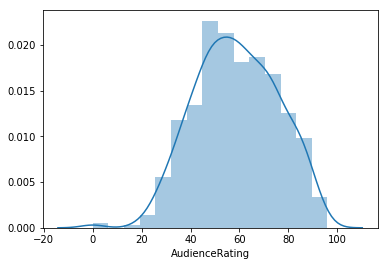

In [24]:
#Histograms
m1=sns.distplot(movies.AudienceRating,bins=15)

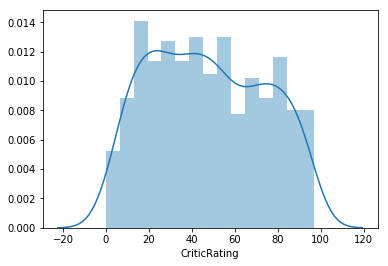

In [32]:
m1=sns.distplot(movies.CriticRating,bins=15)

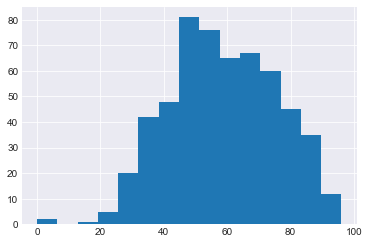

In [59]:
sns.set_style("darkgrid")
n1=plt.hist(movies.AudienceRating,bins=15)

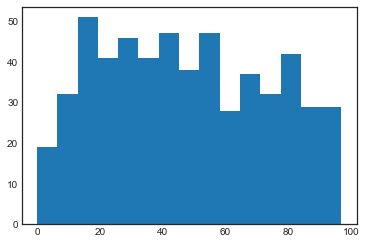

In [35]:
n2=plt.hist(movies.CriticRating,bins=15)

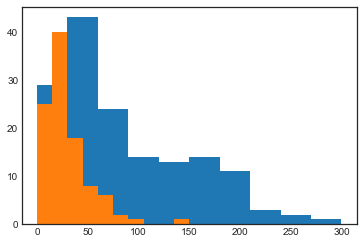

In [41]:
data=movies[movies.Genre == 'Drama'].BudgetMillions
data1=movies[movies.Genre == 'Action'].BudgetMillions
plt.hist(data1)
plt.hist(data)
plt.show()

# We want it to be stacked

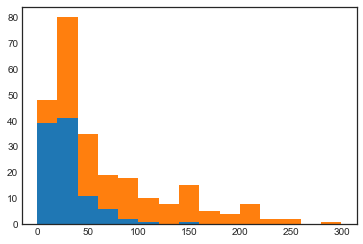

In [45]:
listData=[data,data1]
plt.hist(listData,stacked=True,bins=15)
plt.show()

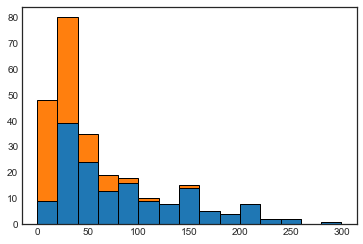

In [48]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,movies[movies.Genre == 'Drama'].BudgetMillions],stacked=True,bins=15,edgecolor='black')
plt.show()

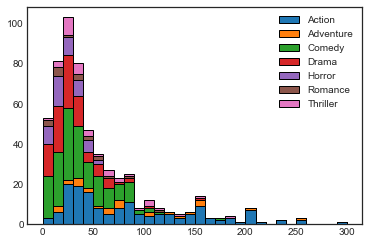

In [57]:
list1=[]
mylabels=[]
for gen in movies.Genre.cat.categories:
    mylabels.append(gen)
    list1.append(movies[movies.Genre == gen].BudgetMillions)
h=plt.hist(list1,stacked=True,edgecolor='black',bins=30,label=mylabels)
plt.legend()
plt.show()

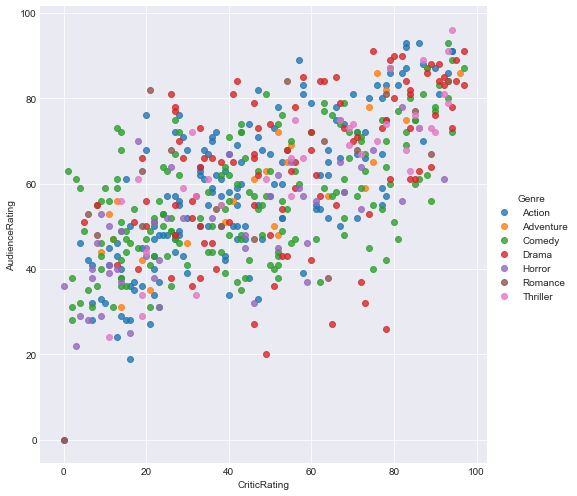

In [60]:
#KDE Plot
vis1=sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',fit_reg=False,hue='Genre',size=7,aspect=1)

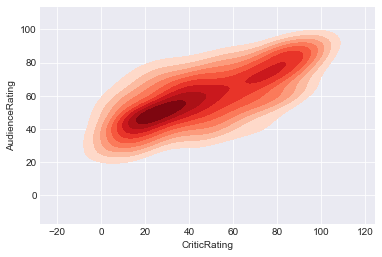

In [64]:
k1=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds')

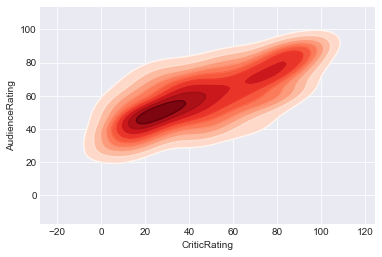

In [65]:
k1=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds')
k1b=sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Reds')

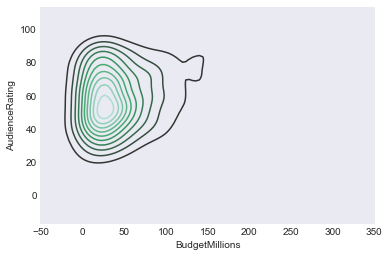

In [67]:
#Working with Subplots()
sns.set_style("dark")
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

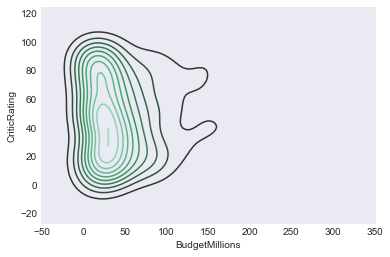

In [69]:
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-30, 160)]

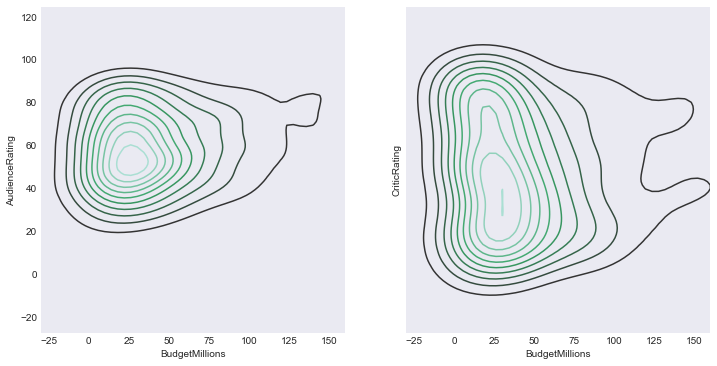

In [79]:
f,axes=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1])
k1.set(xlim=(-30,160))

#2 Dimensional 
#f,axes=plt.subplots(2,2,figsize=(12,6))
#k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0,0])
#k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1,0])


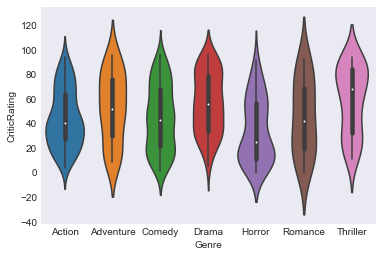

In [82]:

#ViolinPlots
z=sns.violinplot(data=movies,x='Genre',y='CriticRating')

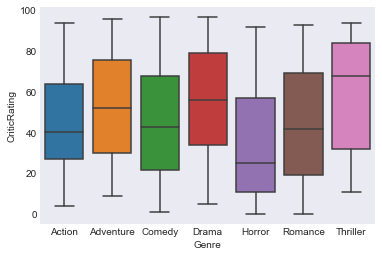

In [84]:
#Boxplots
q=sns.boxplot(data=movies,x='Genre',y='CriticRating')

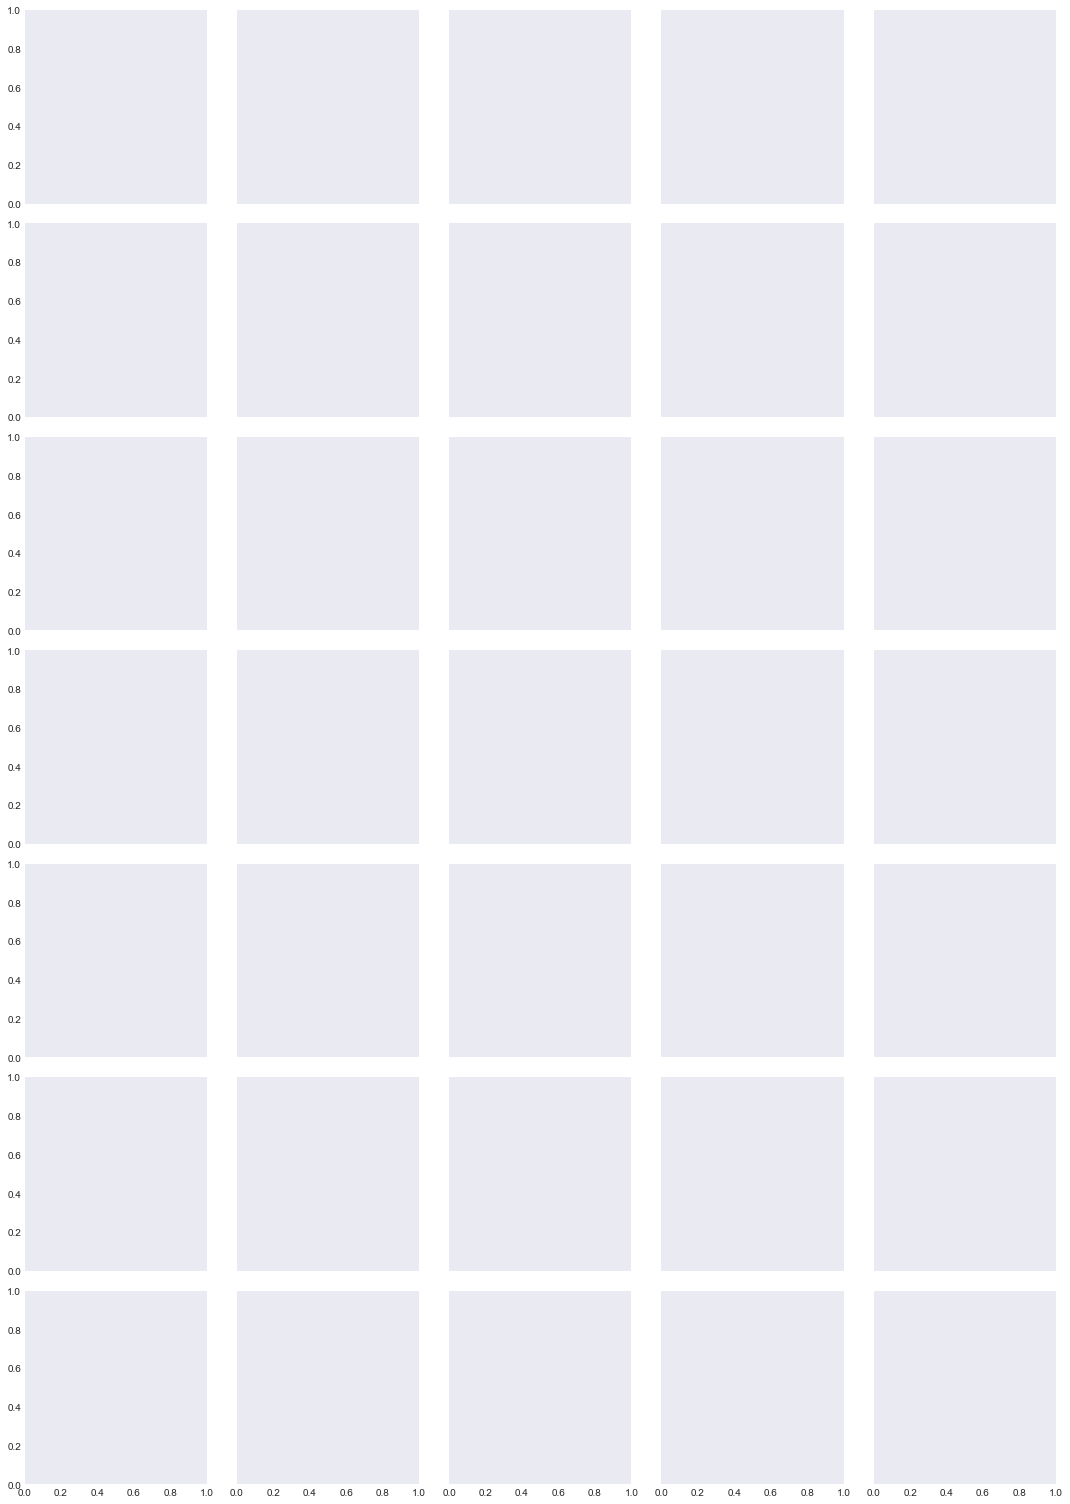

In [87]:
#creating a Facet Grid - Splitting on the basis of some key - split scatter plot
g=sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')

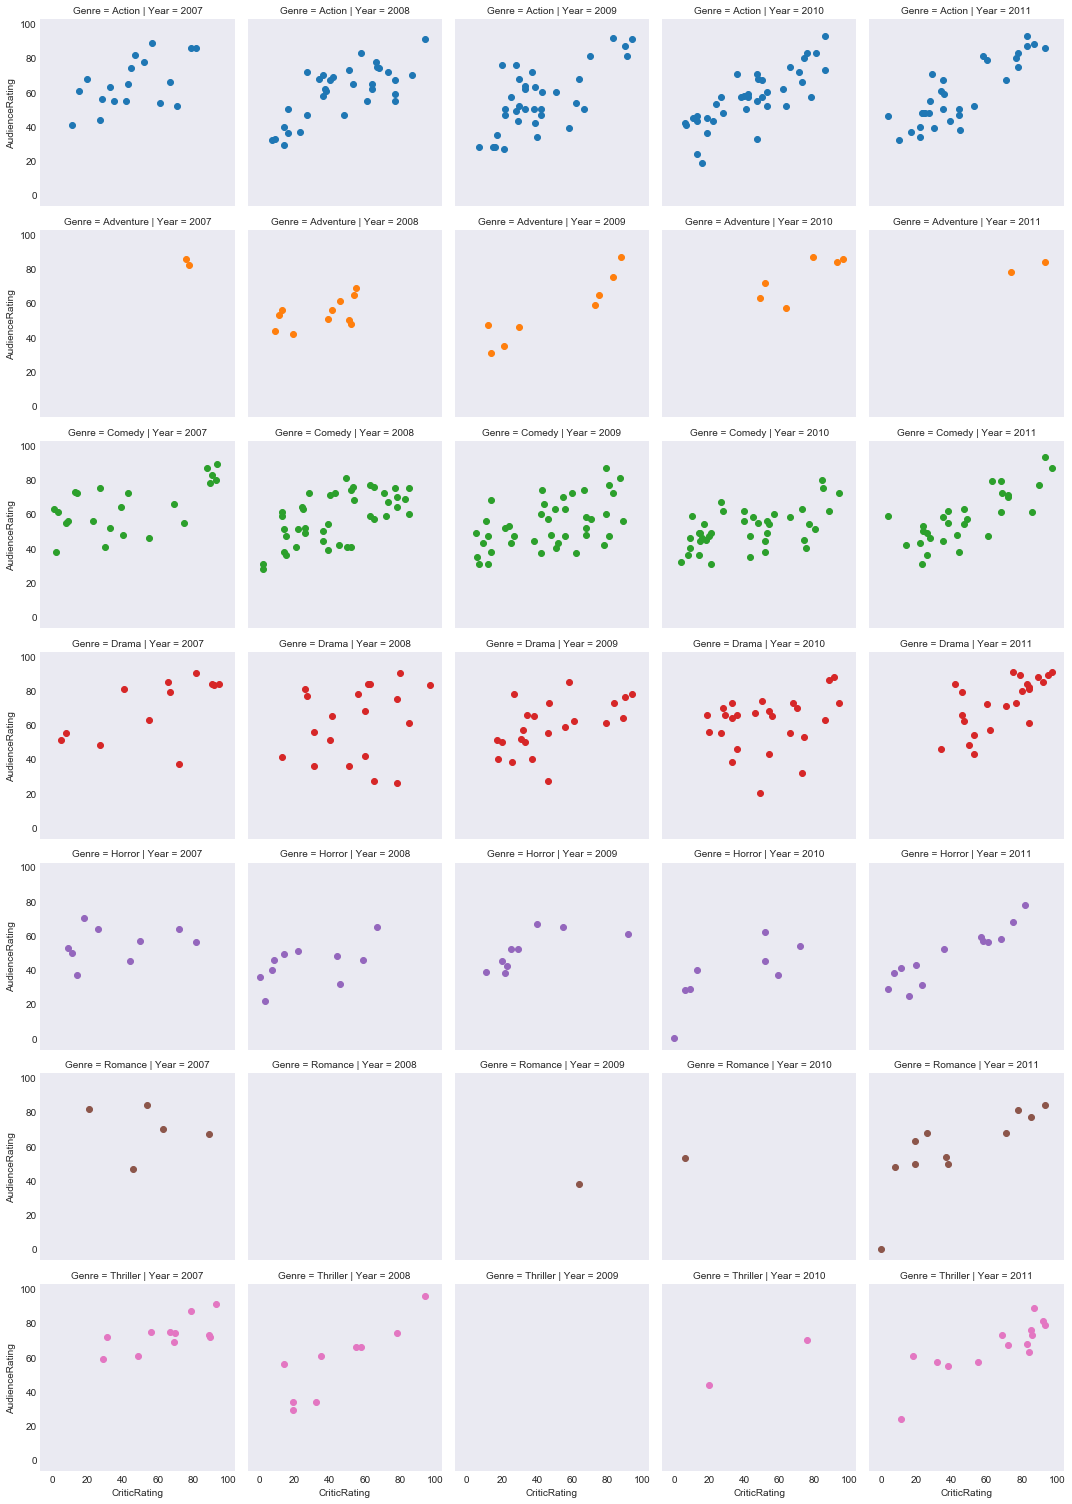

In [88]:
#g=g.map(plt.scatter,movies.CriticRating,movies.AudienceRating) No need to specify the movies
g=sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g=g.map(plt.scatter,'CriticRating','AudienceRating')

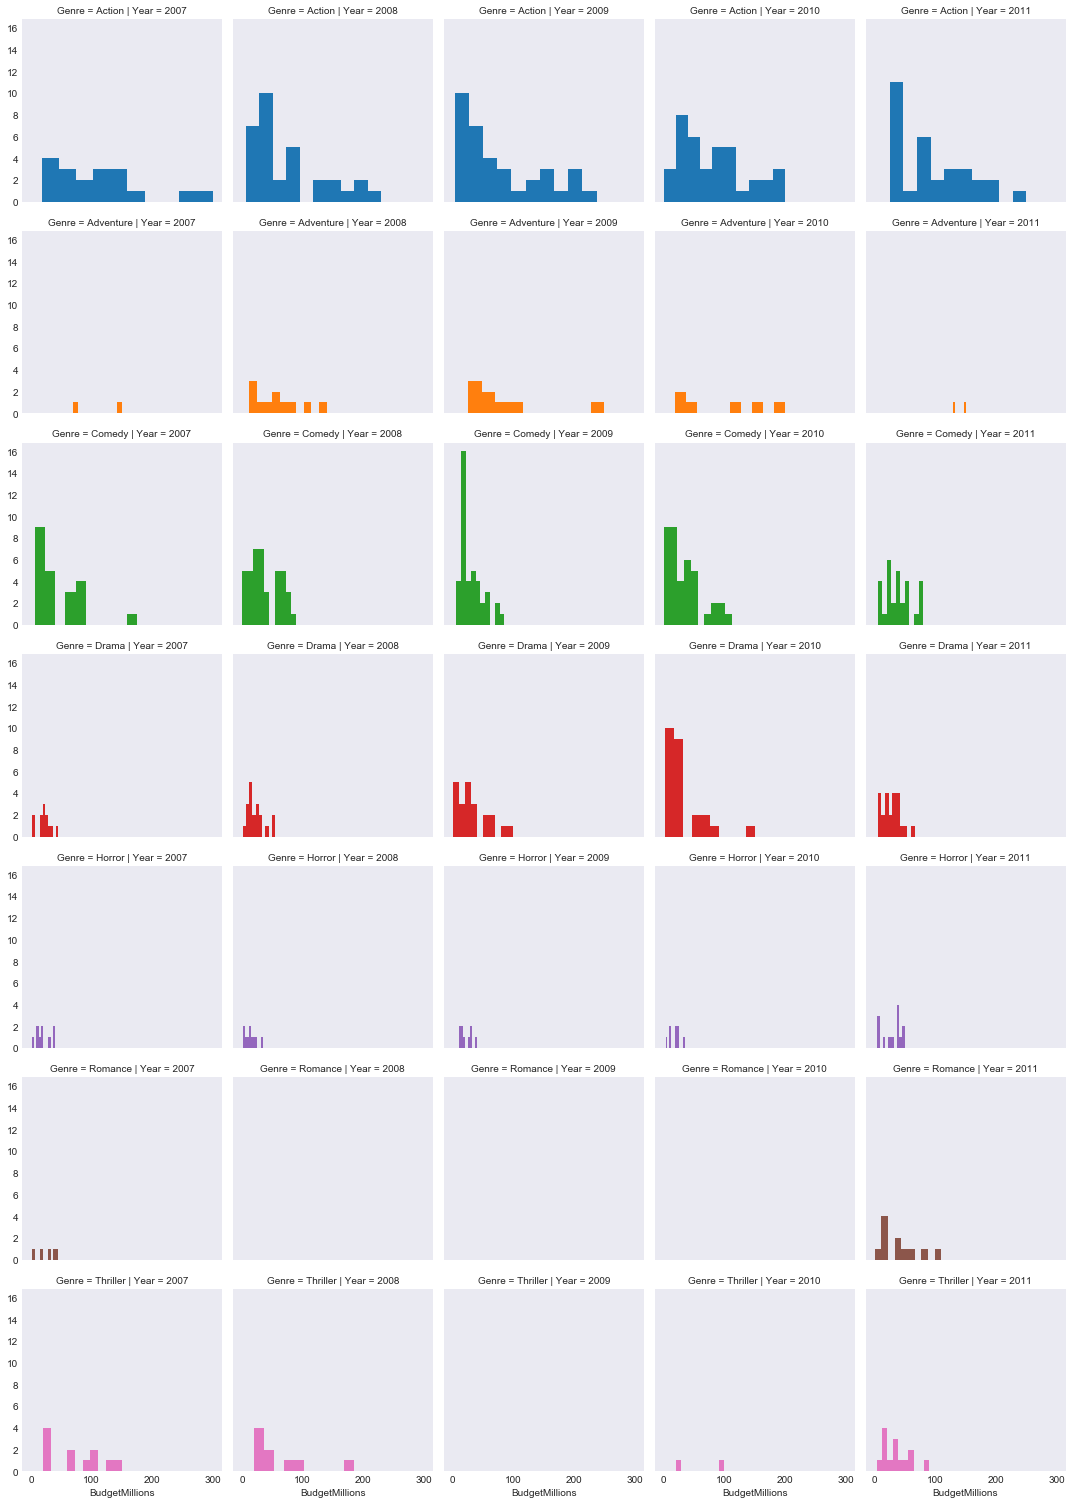

In [89]:
#Can populate with any type of charts

g=sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g=g.map(plt.hist,'BudgetMillions')

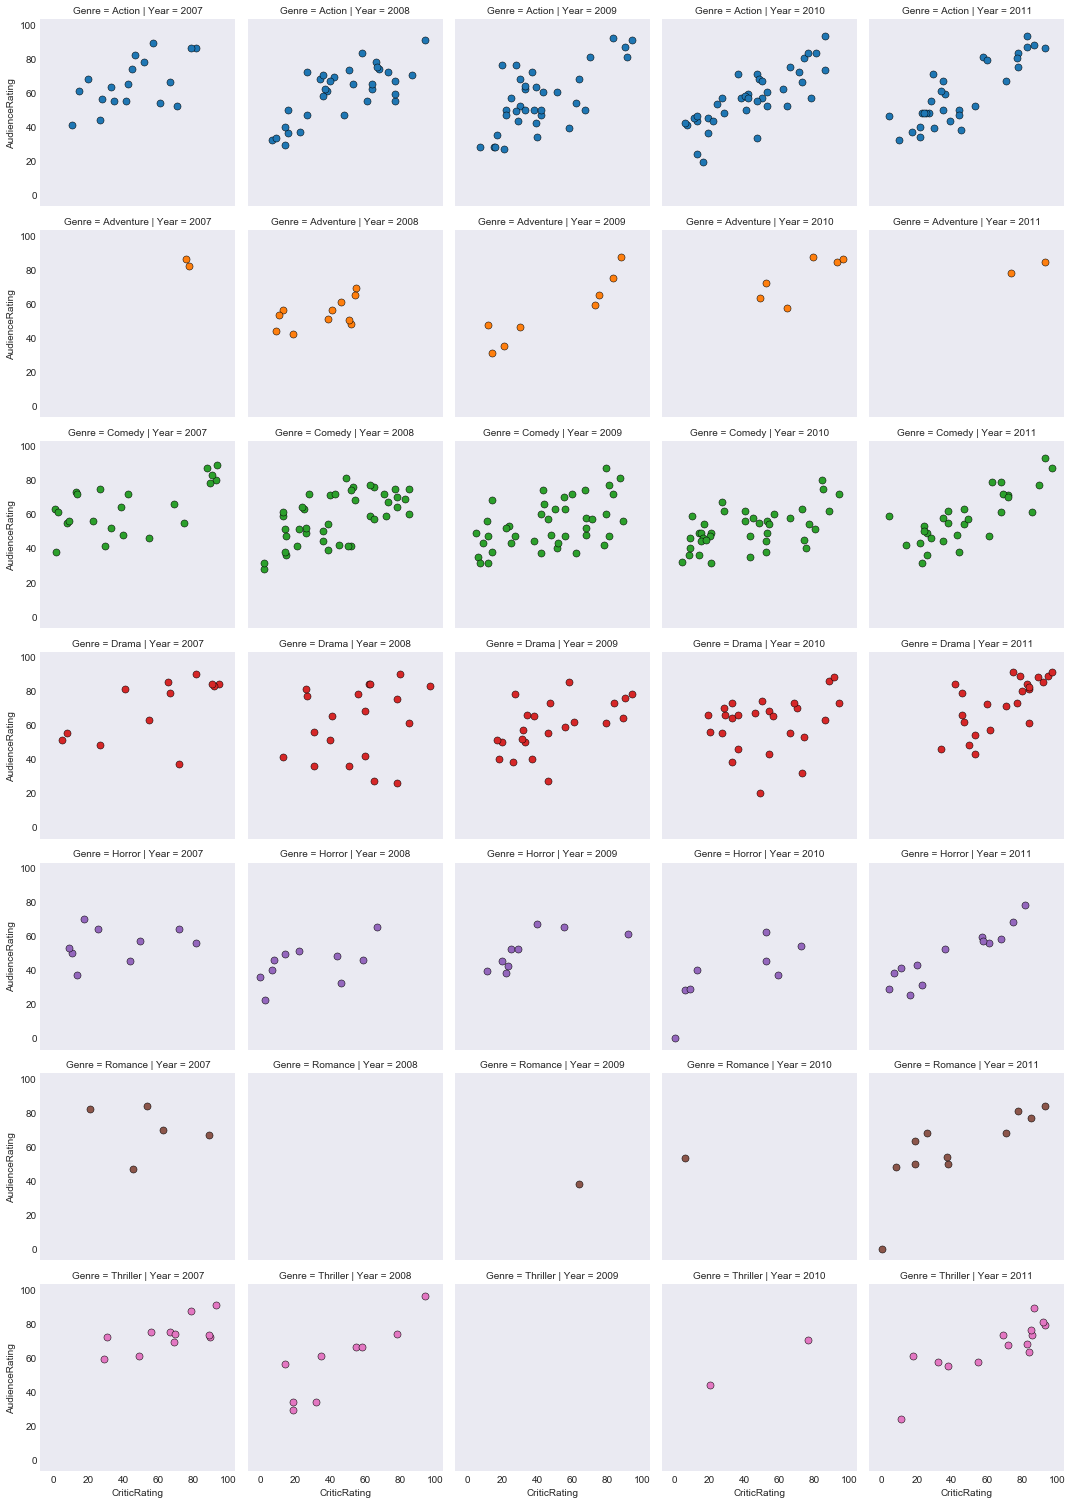

In [91]:
g=sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g=g.map(plt.scatter,'CriticRating','AudienceRating',**kws)

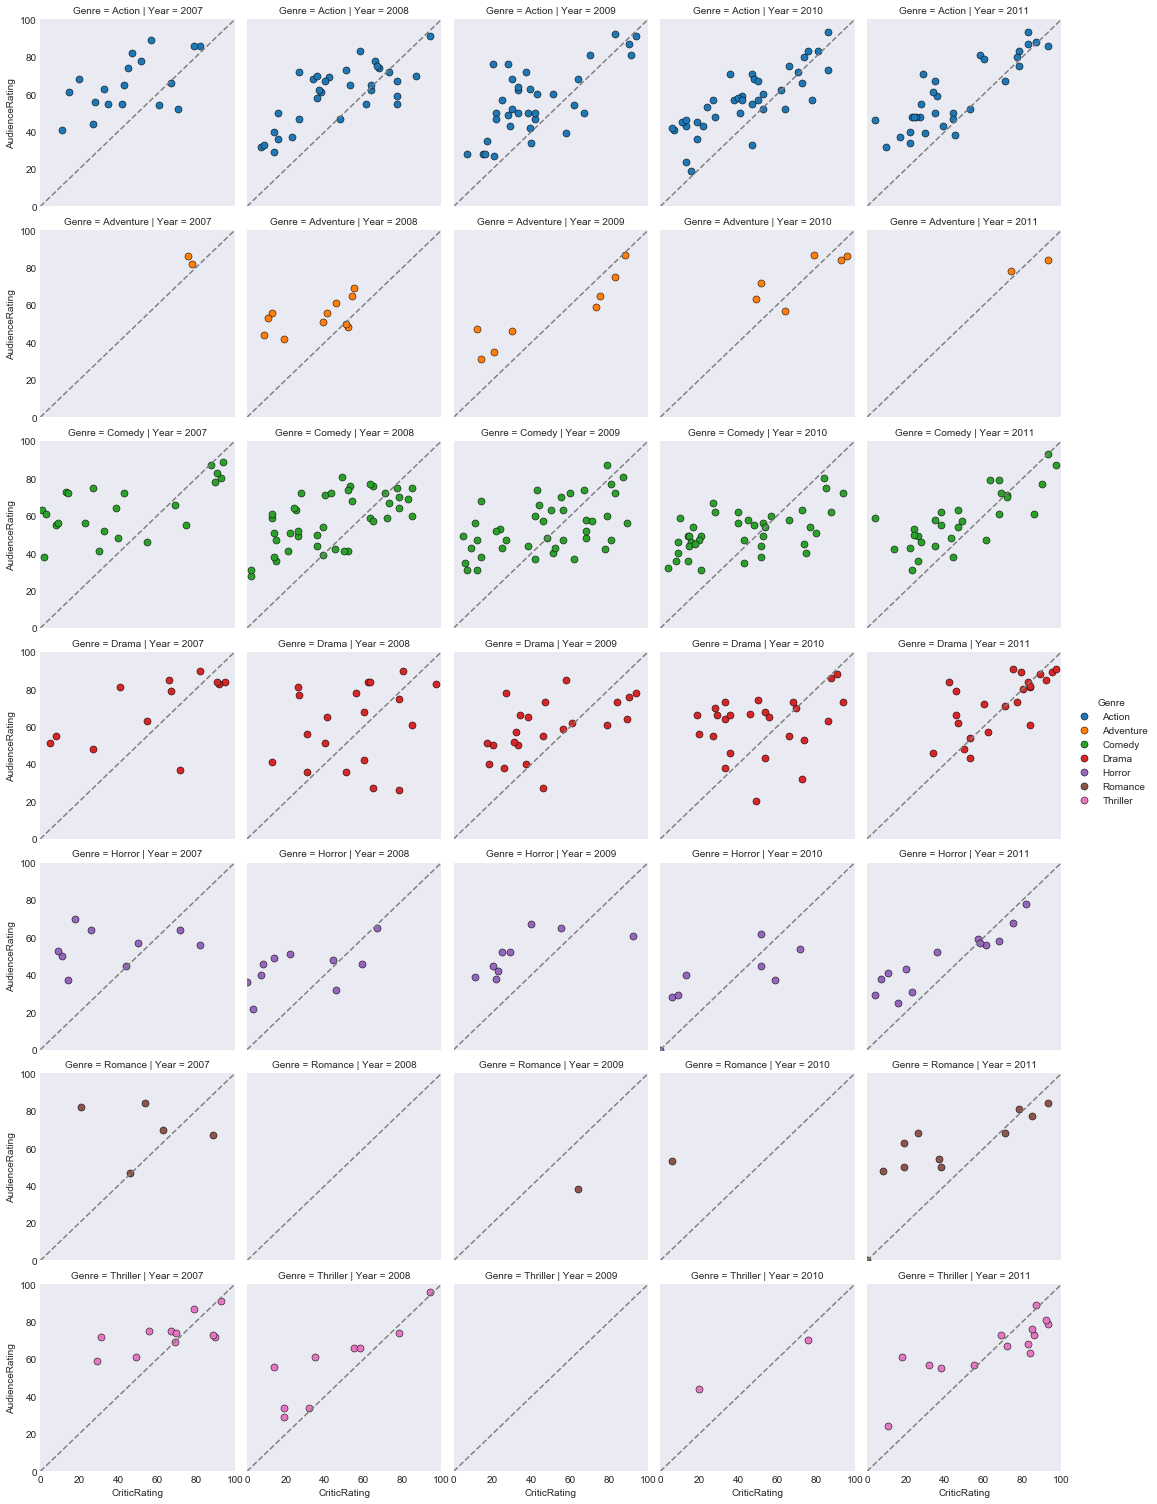

In [94]:
#Controlling Axes and Adding Diagnals
g=sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g=g.map(plt.scatter,'CriticRating','AudienceRating',**kws)

g.set(xlim=(0,100),ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c="gray",ls="--")
    
g.add_legend()    

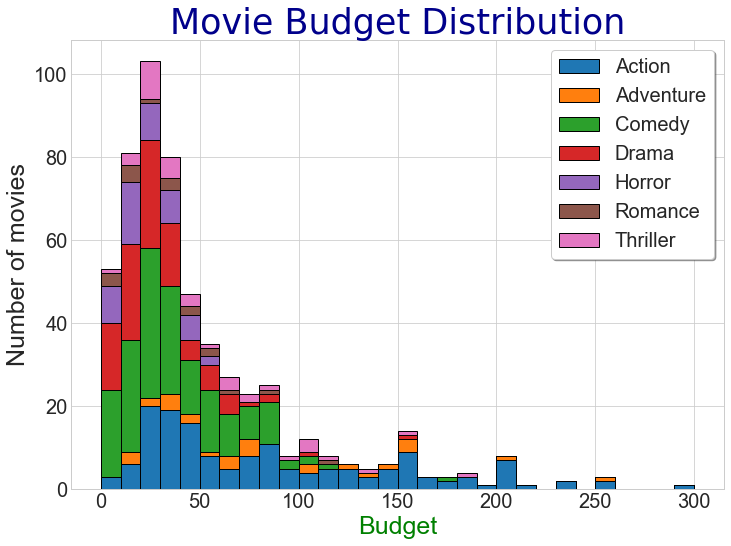

In [37]:

#Thematic Edits

list1=[]
mylabels=[]
for gen in movies.Genre.cat.categories:
    mylabels.append(gen)
    list1.append(movies[movies.Genre == gen].BudgetMillions)
sns.set_style("whitegrid")
fig, ax =plt.subplots()
fig.set_size_inches(11.7,8.27)
h=plt.hist(list1,stacked=True,edgecolor='black',bins=30,label=mylabels)
plt.title("Movie Budget Distribution", fontsize=35,color="DarkBlue", fontname="Console")
plt.ylabel("Number of movies", fontsize=25)
plt.xlabel("Budget",fontsize=25,color="Green")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, shadow=True, prop={'size' : 20})
plt.show()